In [1]:
# SH-I

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lectin = 'UEA'

In [4]:
def plot(x, y,
         filename = 'untitled',
         xlabel = 'glycans',
         ylabel = 'rfus',
         error = None,
         size = (20, 5),
         ticks = 'up'):
    
    if ticks == 'up':
        
        plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
        plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    elif ticks == 'down':
        
        plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
        plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    
    i = np.arange(len(x))
    
    plt.figure(figsize = size)
    plt.bar(i, y, yerr = error, capsize = 3, color = 'black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(i, x, rotation = 'vertical')
    
    if filename == 'untitled':
        
        plt.show()
    
    else:
        
        plt.savefig(filename + '.eps', format = 'eps', bbox_inches = 'tight', metadata = 'eps')

In [5]:
# align

cfg = pd.read_excel('figures/cfg/CFG_' + lectin + '.xls')
liga = pd.read_csv('figures/liga/LiGA_' + lectin + '.csv')

order = pd.read_csv('figures/order.csv')

cfg_glycans = pd.read_csv('figures/cfg_glycans.csv')
liga_glycans = pd.read_csv('figures/liga_glycans.csv')

assert len(cfg['Structure on Masterlist']) == 611, 'Not the same length bruh.'
cfg['IUPAC (CFG)'] = cfg_glycans['IUPAC'].values
liga_dict = dict(zip(liga_glycans['Glycan'], liga_glycans['IUPAC']))
liga['IUPAC (LiGA)'] = liga['Mod'].map(liga_dict)

cfg = cfg[['IUPAC (CFG)', 'Average RFU', 'StDev']]
liga = liga[['IUPAC (LiGA)', 'total']]

cfg_dict_rfu = dict(zip(cfg['IUPAC (CFG)'], cfg['Average RFU']))
cfg_dict_std = dict(zip(cfg['IUPAC (CFG)'], cfg['StDev']))
liga_dict = dict(zip(liga['IUPAC (LiGA)'], liga['total']))

order['total'] = order['IUPAC (LiGA)'].map(liga_dict)
order['Average RFU'] = order['IUPAC (CFG)'].map(cfg_dict_rfu)
order['StDev'] = order['IUPAC (CFG)'].map(cfg_dict_std)
aligned = order[['IUPAC (LiGA)', 'total', 'IUPAC (CFG)', 'Average RFU', 'StDev']]

aligned.iloc[-1, 3:] = aligned.iloc[-1, 3:].fillna(0)

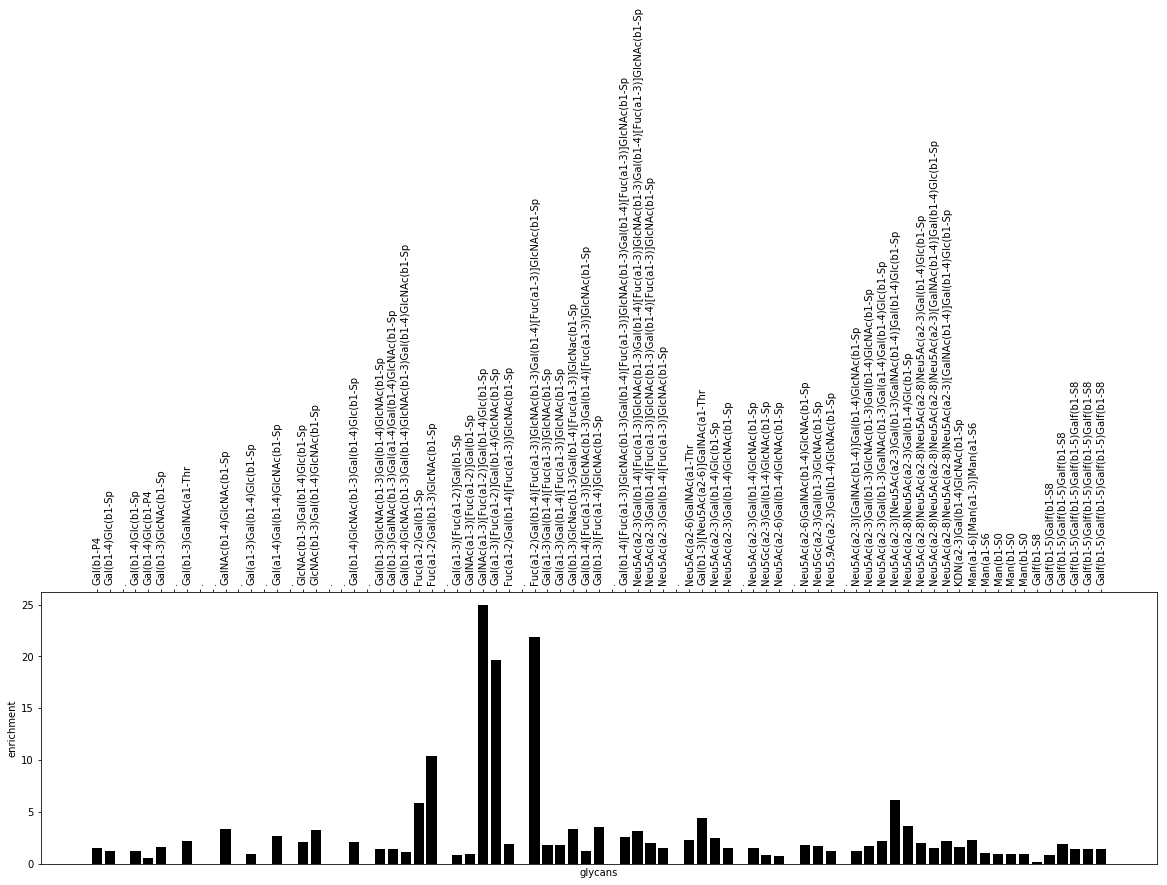

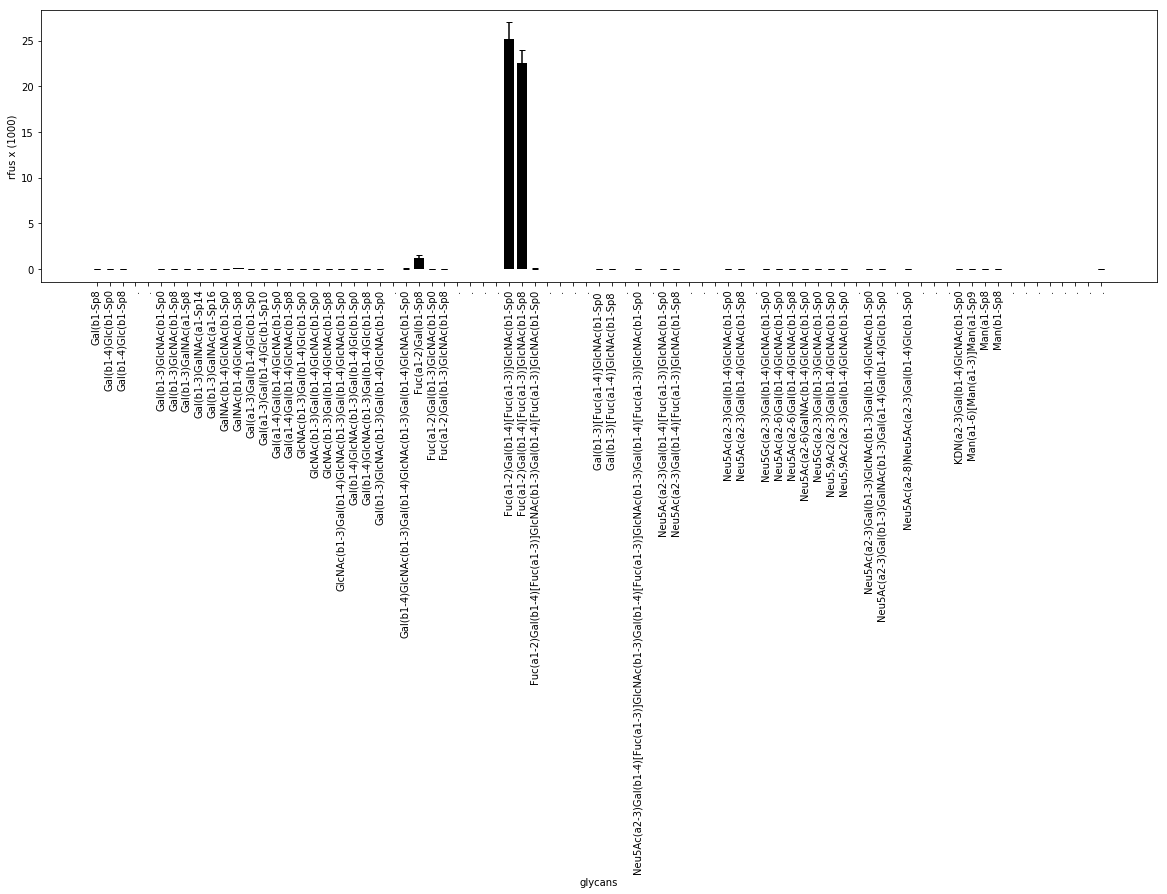

In [6]:
# plot

aligned['IUPAC (LiGA)'] = aligned['IUPAC (LiGA)'].fillna('.')

plot(aligned['IUPAC (LiGA)'], aligned['total'],
     filename = 'figures/LiGA_' + lectin,
     ylabel = 'enrichment',
     ticks = 'up')

aligned['IUPAC (CFG)'] = aligned['IUPAC (CFG)'].fillna('.')
aligned['Average RFU'] = aligned['Average RFU'].values / 1000
aligned['StDev'] = aligned['StDev'] / 1000

plot(aligned['IUPAC (CFG)'], aligned['Average RFU'],
     filename = 'figures/CFG_' + lectin,
     error = aligned['StDev'],
     ylabel = 'rfus x (1000)',
     ticks = 'down')